# What factors made people more likely to survive on the Titanic?

In [1]:
#Basic import statements
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the titanic dataset, print length of dataframe, and the numbers of survivors
df = pd.read_csv('titanic-data.csv')
print "There are %i rows in the dataframe." % len(df)
print "In this sample, %i people survived while %i people perished." % (len(df[df['Survived'] == 1]),len(df[df['Survived'] == 0]) )

There are 891 rows in the dataframe.
In this sample, 342 people survived while 549 people perished.


In [3]:
#Output the top 20 rows of the dataframe for examination
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Show the data types for all columns in the dataframe
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### After a quick examination of the dataframe it appears that Cabin contains many null values and will not be used in the analysis. In addition, PassengerId is just a unique identifier with no predictive ability. The Name and Ticket features would also appear to be unique identifiers; however, there could be additional features extracted and one of those options is explored later in the analysis.
### For the purpose of this analysis, Pclass, Sex, Sibsp, Parch, and Embarked will be considered classification features while Age and Fare are continuous ratio values. Sibsp and Parch will also be correlated as discrete ratio values in addition to their classification exploration.
### Note: The correlations and charts featured below remove Null values during operation. Any explicit removal of null values will be noted as a comment in the code box.

In [5]:
#Show basic dataframe statistics
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### The following is shown from the above statistics:
1. At least 75% of the sample were in 2nd or 3rd class.
2. At least 75% of the sample with age data were below ~40 years old with an average of ~30. In addition, 177 instances in the sample had an age missing.
3. At least 75% of the sample had one or less sibling/spouse with them.
4. At least 75% of the sample had no parent or child with them.
5. At least 75% of the sample paid 31 or less for their fare with an average of 32.

## Are woman and children really first?
The first features we will be exploring are Sex and Age.
## Correlation Between Sex and Survival
First we'll get an idea of the absolute numbers in the sample.

There were 577 males and 314 females in the sample set.


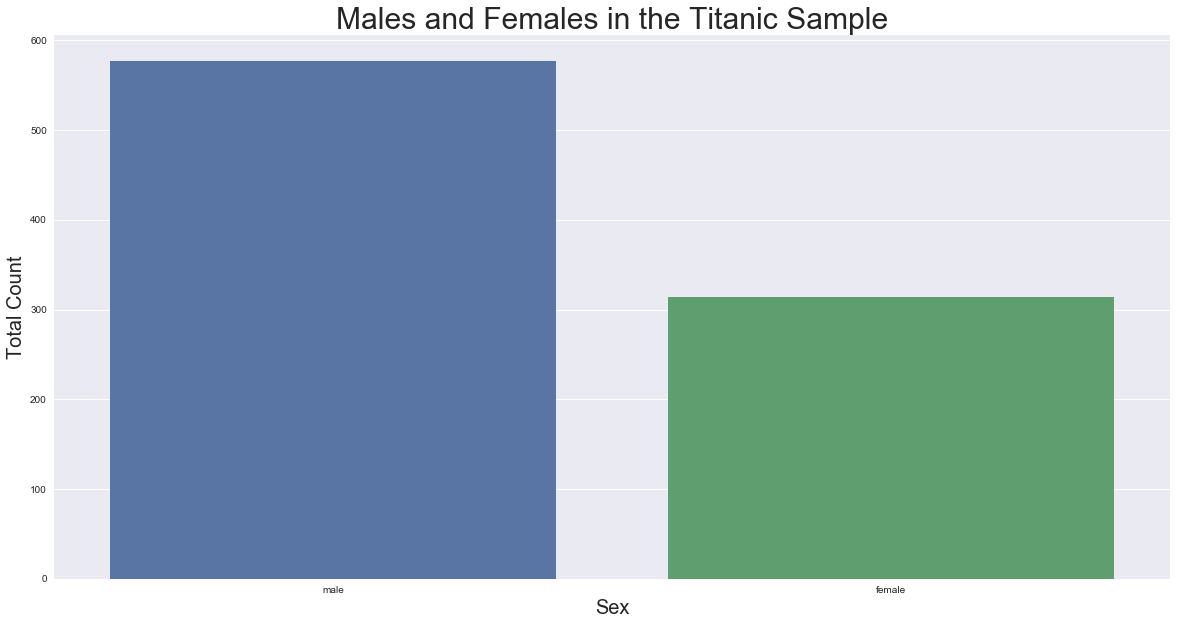

In [57]:
#Adjust plot size and create a countplot
print "There were %i males and %i females in the sample set." % (len(df[df['Sex'] == 'male']), len(df[df['Sex'] == 'female']))
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.countplot(x="Sex", data=df)
plot.set_title("Males and Females in the Titanic Sample", fontsize=30)
plot.set_xlabel("Sex", fontsize=20)
plot.set_ylabel("Total Count", fontsize=20);

### We can see that there are almost twice as many males as females in the sample.

In [7]:
#A new dataframe is created with the Survived column and dummie columns for Sex.
#Note: Pandas corr function uses Pearson correlation by default and correlates all columns with each other
#We're only printing out the first column of the correlation dataframe
pd.concat([df['Survived'], pd.get_dummies(df['Sex']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
female,0.543351
male,-0.543351


### Above we can see a moderate to high positive correlation between females and survival with a moderate to high negative correlation with males and survival.
### We are using point plots for the categorical features as it shows the survival mean along with a bar for the 95% confidence interval.

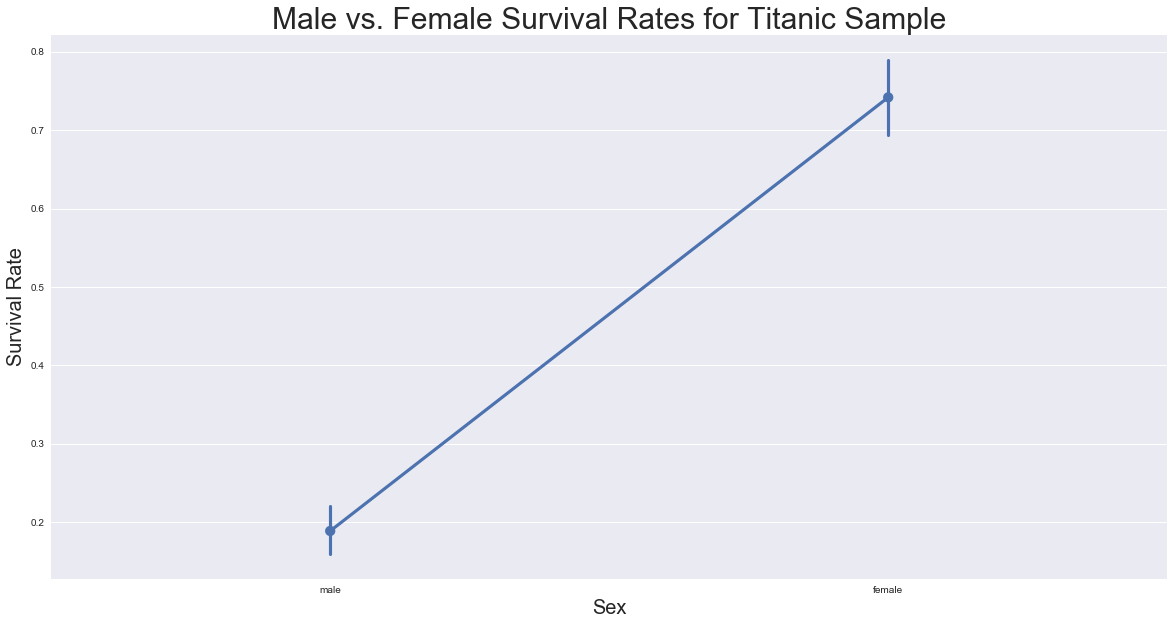

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="Sex", y="Survived", data=df)
plot.set_title('Male vs. Female Survival Rates for Titanic Sample', fontsize=30)
plot.set_xlabel("Sex", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20);

### The chart above shows an obvious difference in the mean between females and males surviving the Titanic with females having about a .75 mean survival as opposed to the males which are around .19.
## Correlation Between Age and Survival

In [9]:
#Calculate the correlation between Age and Survival
df[['Survived', 'Age']].corr()[['Survived']]

,Survived
Survived,1.000000
Age,-0.077221


### Age and Survival show a very low correlation.

### The plots below show the distribution by age for both survivors and non-survivors. 

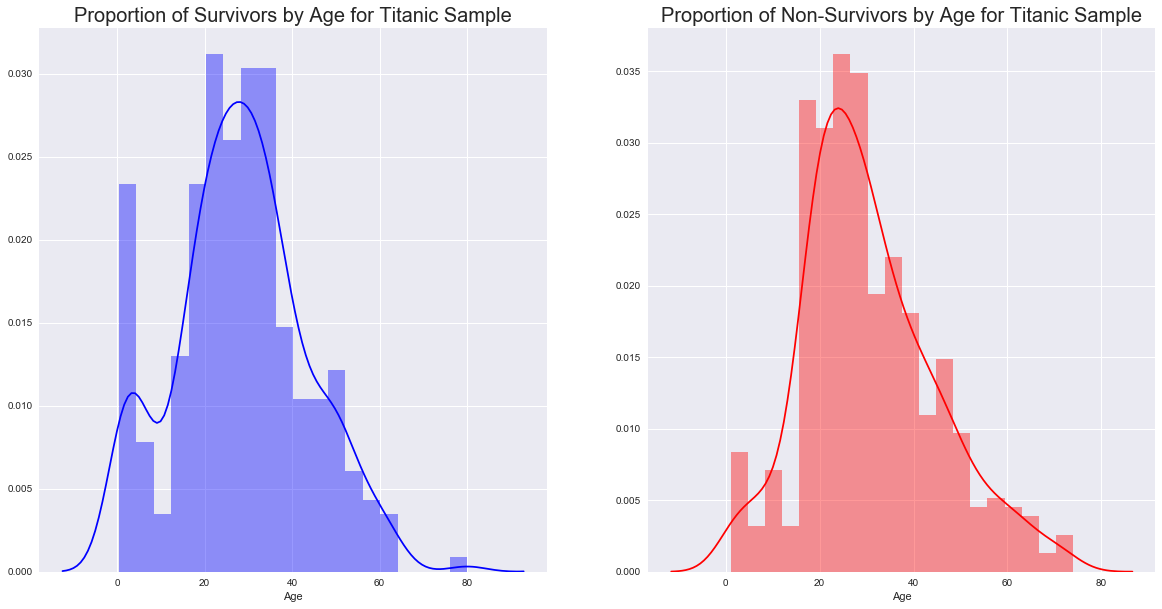

In [53]:
fig, ax =plt.subplots(1,2, figsize=(20, 10))
#Plot histograms along with an estimated distribution based on Survived and Age that is not null.
sns.distplot(df[(df['Survived'] == 1) & (df['Age'].notnull())]['Age'], bins=20, color="b", ax=ax[0]).set_title('Proportion of Survivors by Age for Titanic Sample', fontsize=20);
sns.distplot(df[(df['Survived'] == 0) & (df['Age'].notnull())]['Age'], bins=20, color="r", ax=ax[1]).set_title('Proportion of Non-Survivors by Age for Titanic Sample', fontsize=20);

### It appears that overall, the distributions for age of survivors and non-survivors are similar, there is a spike of children under 10 on the survivors chart which could indicate that, under a certain threshold, age is more highly positively correlated with survival.

### Now we'll move onto the other features for possible survival correlations.
## Correlation between Embarkation Ports and Survival
### According to Kaggle's data dictionary these are: C = Cherbourg, Q = Queenstown, S = Southampton

Count of Embarkation Ports: Southampton: 644; Cherbourg: 168; Queenstown: 77.


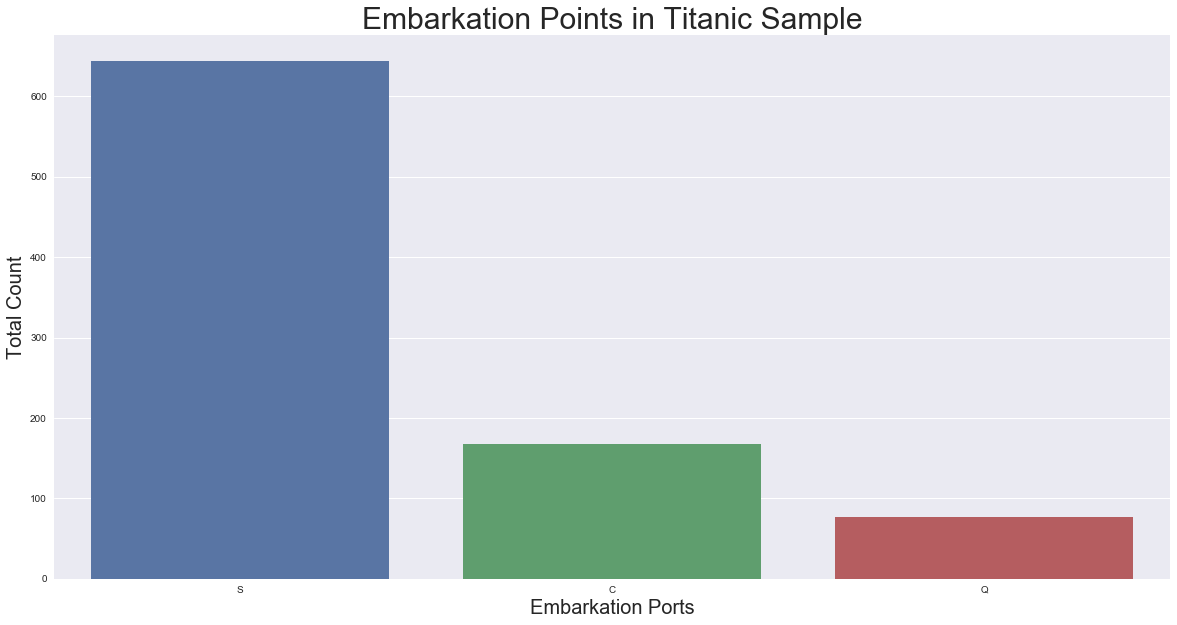

In [56]:
print "Count of Embarkation Ports: Southampton: %i; Cherbourg: %i; Queenstown: %i." % (len(df[df['Embarked'] == 'S']), len(df[df['Embarked'] == 'C']), len(df[df['Embarked'] == 'Q']))
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.countplot(x="Embarked", data=df)
plot.set_title('Embarkation Points in Titanic Sample', fontsize=30)
plot.set_xlabel("Embarkation Ports", fontsize=20)
plot.set_ylabel("Total Count", fontsize=20);

### By far, most people's embarkation port was Southampton.

In [12]:
#A new dataframe is created with the Survived series and dummie columns for Embarked
pd.concat([df['Survived'], pd.get_dummies(df['Embarked']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.00000
C,0.16824
Q,0.00365
S,-0.15566


### Cherbourg appears to have a slight positive correlation with survival and Southampton has a slight negative correlation, but overall it doesn't appear that the embarkation point is correlated with survival.

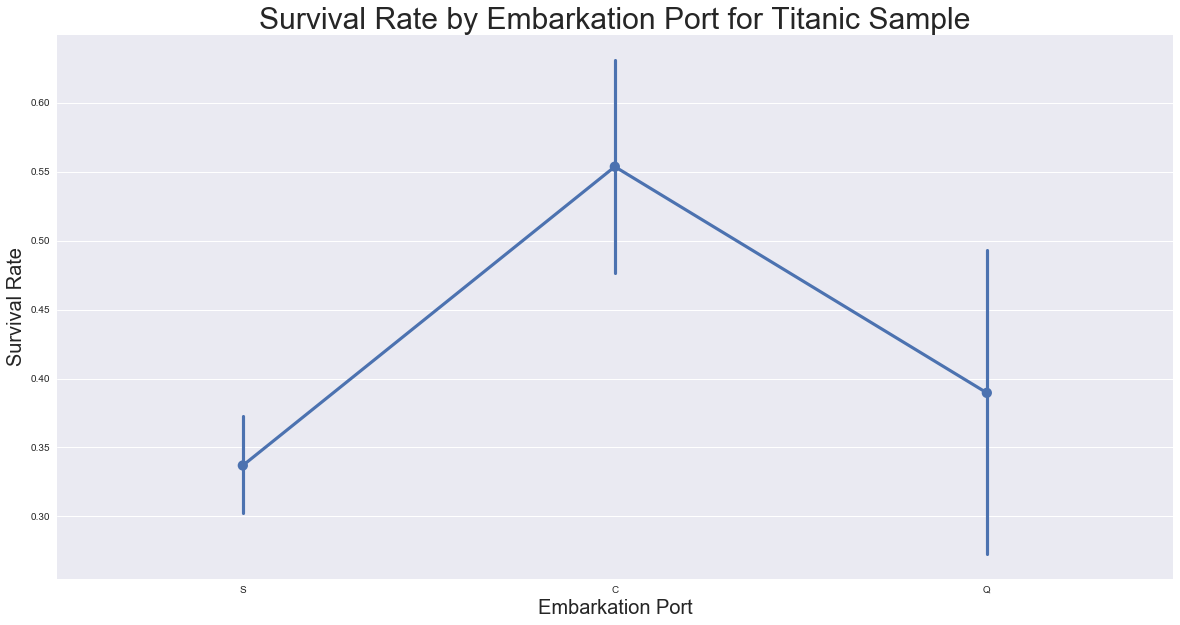

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="Embarked", y="Survived", data=df)
plot.set_title("Survival Rate by Embarkation Port for Titanic Sample", fontsize=30)
plot.set_xlabel("Embarkation Port", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20);

### While Cherbourg appears to have a higher average survival rate, the confidence intervals are wide and overlap other values leaving a lot of uncertainty to the predictive power of this feature.

### Since Sex appears to be highly correlated with survival, we'll began to add that as another category in the charts.

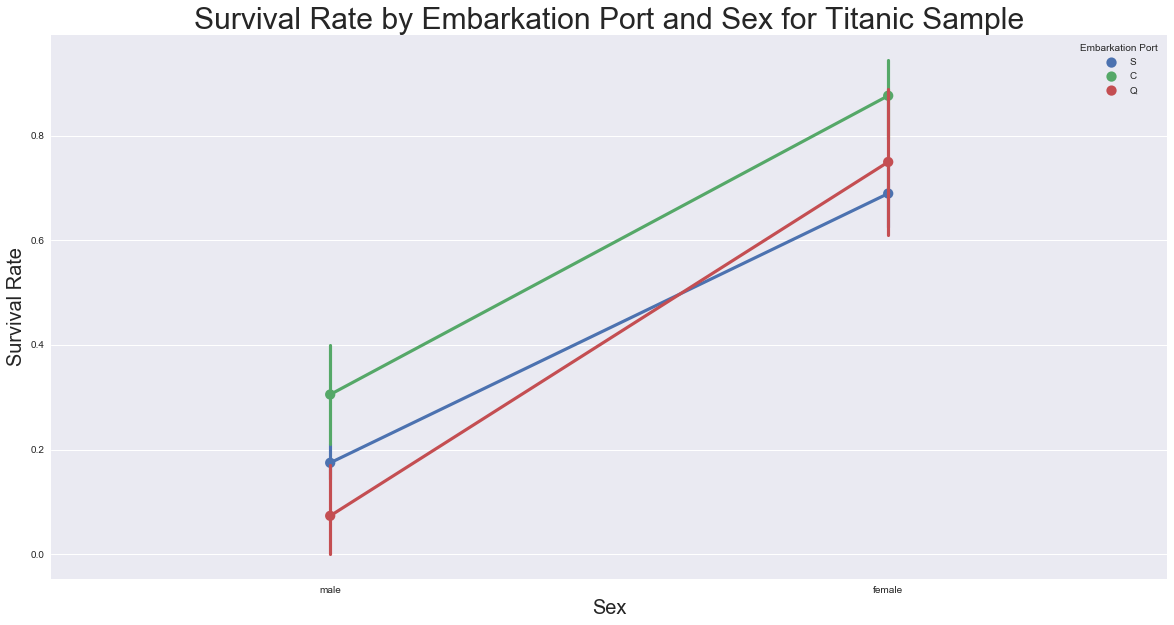

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="Sex", y="Survived", hue="Embarked", data=df)
plot.set_title("Survival Rate by Embarkation Port and Sex for Titanic Sample", fontsize=30)
plot.set_xlabel("Sex", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20)
plt.legend(title="Embarkation Port");

### It appears that even male passengers with an embarkation point of Cherbourg had a slightly higher survival rate, but this could be due to such a small sample from that port.
## Correlation Between Passenger Classes and Survival

Count of Passenger Classes: First: 216; Second: 184; Third: 491.


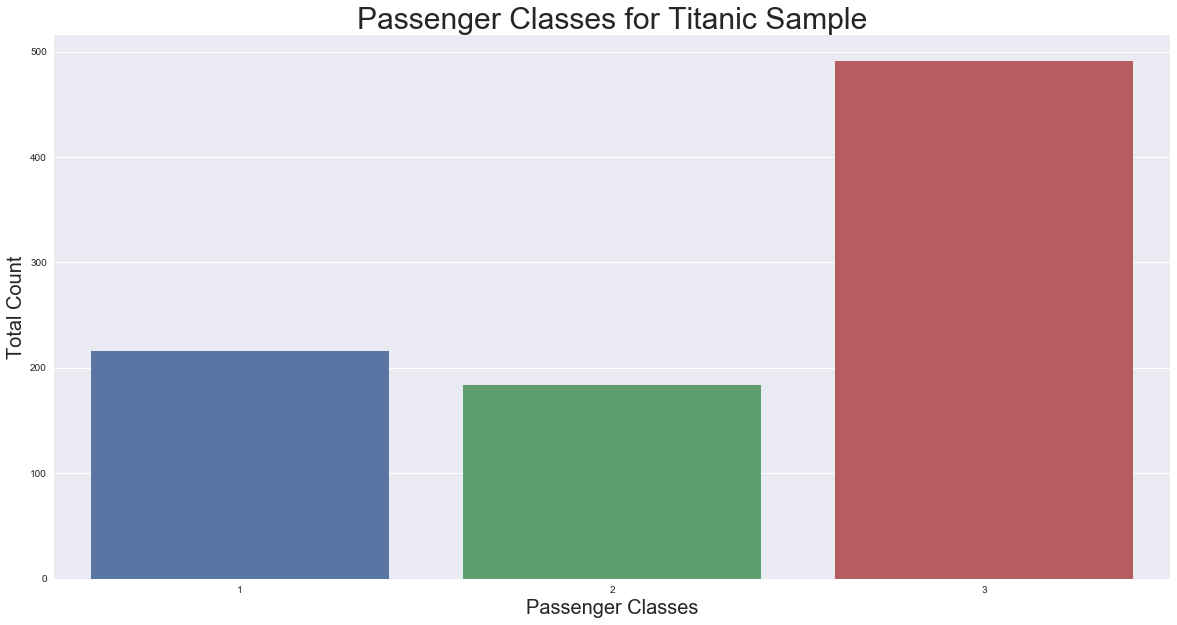

In [60]:
print "Count of Passenger Classes: First: %i; Second: %i; Third: %i." % (len(df[df['Pclass'] == 1]), len(df[df['Pclass'] == 2]), len(df[df['Pclass'] == 3]))
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.countplot(x="Pclass", data=df)
plot.set_title("Passenger Classes for Titanic Sample", fontsize=30)
plot.set_xlabel("Passenger Classes", fontsize=20)
plot.set_ylabel("Total Count", fontsize=20);

In [16]:
#A new dataframe is created with the Survived series and dummie columns for Passenger Classes
pd.concat([df['Survived'], pd.get_dummies(df['Pclass']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
1,0.285904
2,0.093349
3,-0.322308


### There's a moderate positive correlation between survival and first class with a moderate negative correlation between survival and third class.

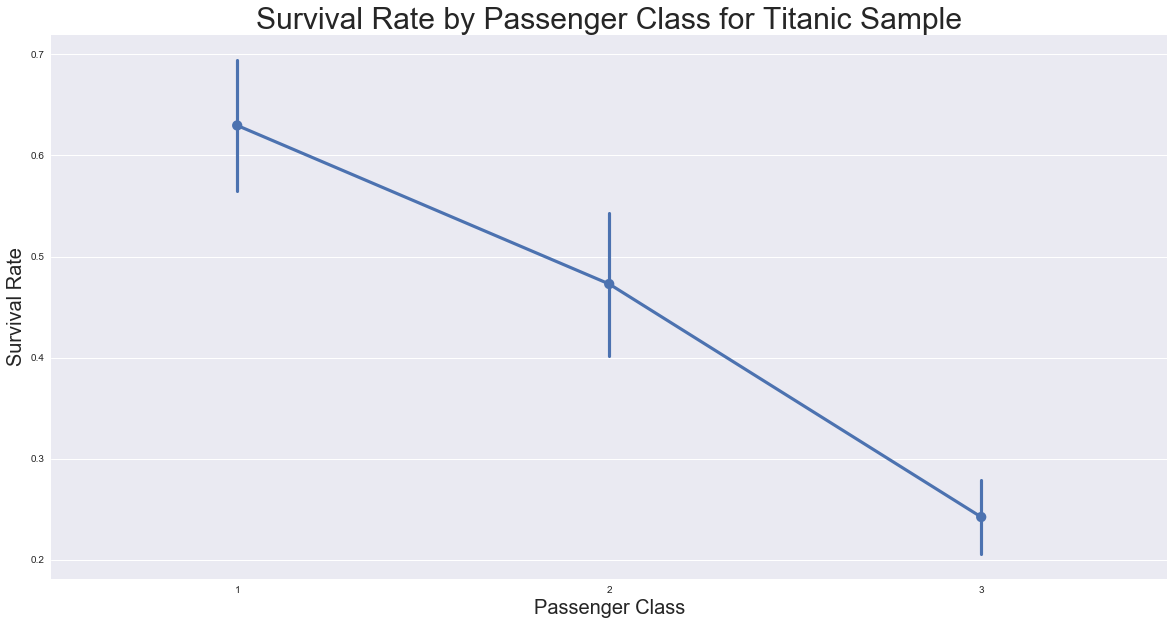

In [61]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="Pclass", y="Survived", data=df)
plot.set_title("Survival Rate by Passenger Class for Titanic Sample", fontsize=30)
plot.set_xlabel("Passenger Class", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20);

### It appears that being a first class passenger is more positively correlated with survival.

### Below, it appears that for males in first class there is a higher correlation with survival.

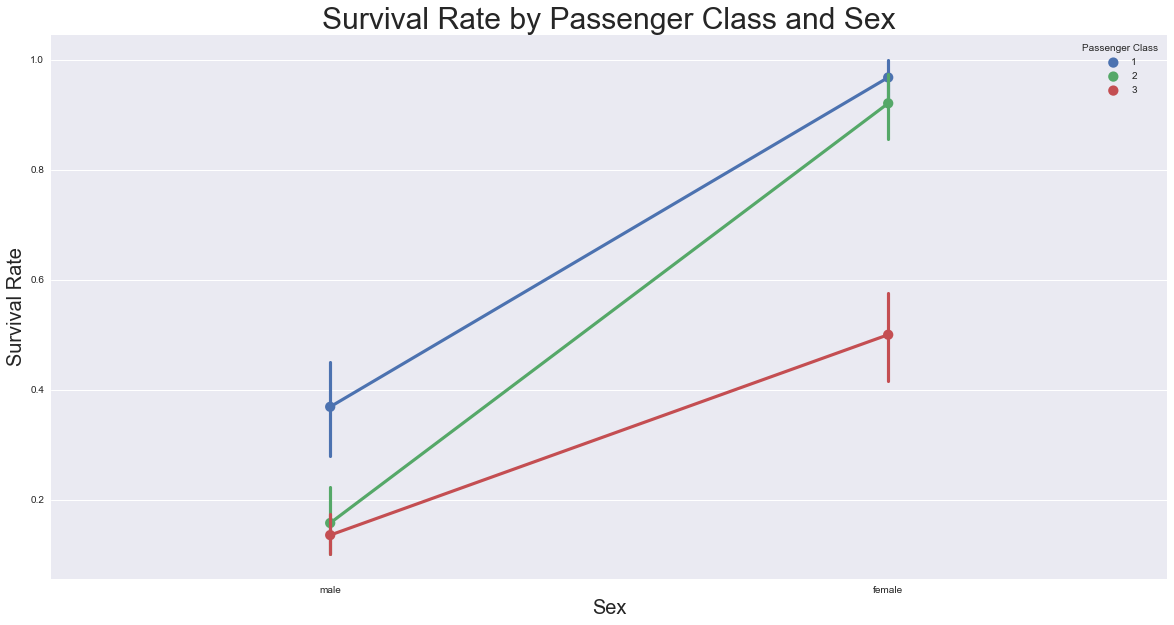

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=df)
plot.set_title("Survival Rate by Passenger Class and Sex", fontsize=30)
plot.set_xlabel("Sex", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20)
plt.legend(title="Passenger Class");

## Correlation Between Number of Siblings/Spouses and Survival

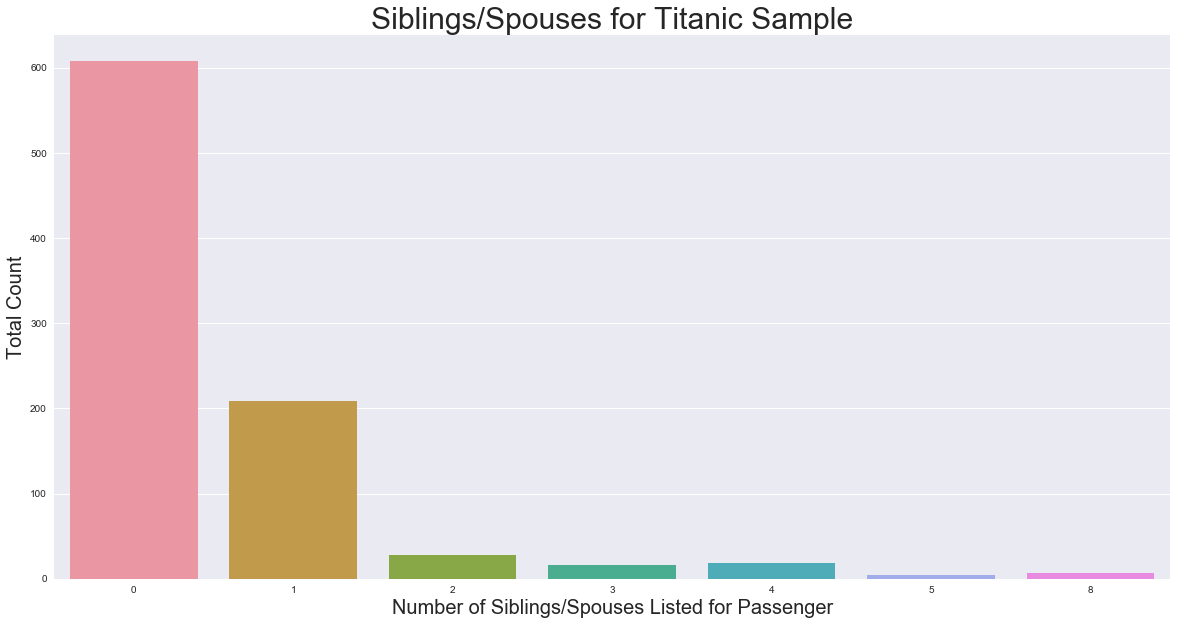

In [63]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.countplot(x="SibSp", data=df)
plot.set_title("Siblings/Spouses for Titanic Sample", fontsize=30)
plot.set_xlabel("Number of Siblings/Spouses Listed for Passenger", fontsize=20)
plot.set_ylabel("Total Count", fontsize=20);

### From the chart above, it appears that both 5 and 8 consist of only the people in that family. The majority of people had no siblings or spouses with them on the Titanic.

In [20]:
#A new dataframe is created with the Survived series and dummie columns for Siblings/Spouses
pd.concat([df['Survived'], pd.get_dummies(df['SibSp']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
0,-0.115867
1,0.173076
2,0.029796
3,-0.037215
4,-0.064123
5,-0.059292
8,-0.070234


In [21]:
#Calculate the correlation between Siblings/Spouses and Survival, this correlation treats the Siblings/Spouses
#as a discrete ratio variable instead of a classification
df[['Survived', 'SibSp']].corr()[['Survived']]

,Survived
Survived,1.000000
SibSp,-0.035322


### Siblings/Spouses of 0 shows a slight negative correlation with survival rate and 1 shows a slight positive correlation.

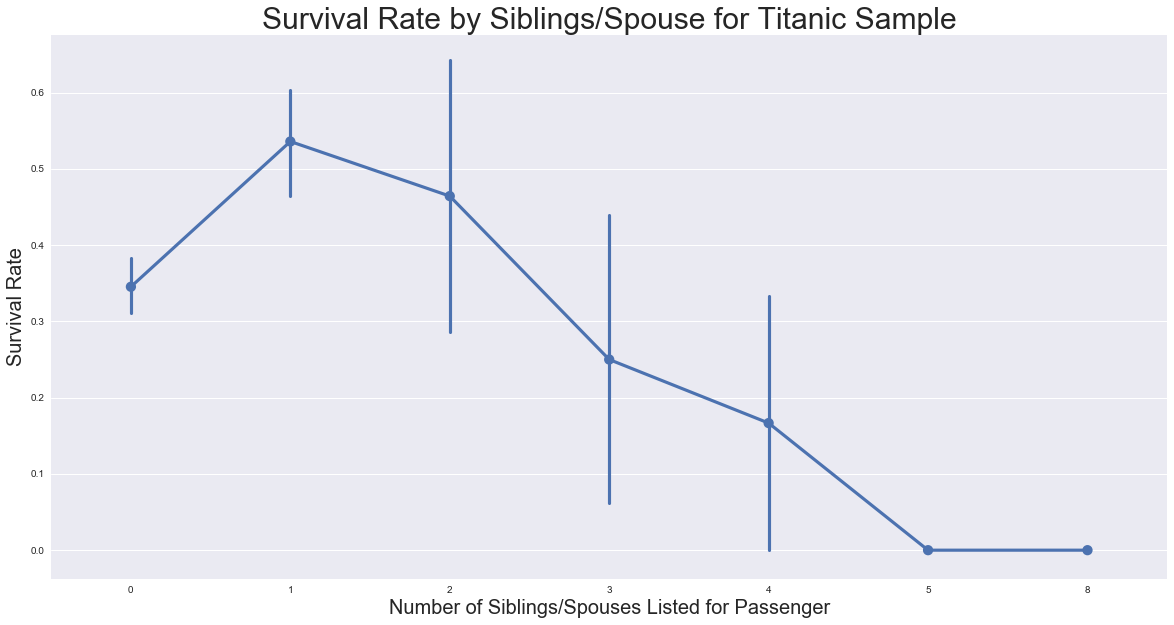

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="SibSp", y="Survived", data=df)
plot.set_title("Survival Rate by Siblings/Spouse for Titanic Sample", fontsize=30)
plot.set_xlabel("Number of Siblings/Spouses Listed for Passenger", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20);

### Siblings/Spouses does not appear to be a good predictor of survival. Amounts above one don't have enough instances for an appropriate confidence interval.

### As seen below, the female sample for the amounts >= 2 have the most instances and almost the same survival mean while the confidence intervals of the other females overlap those with less Siblings/Spouse numbers

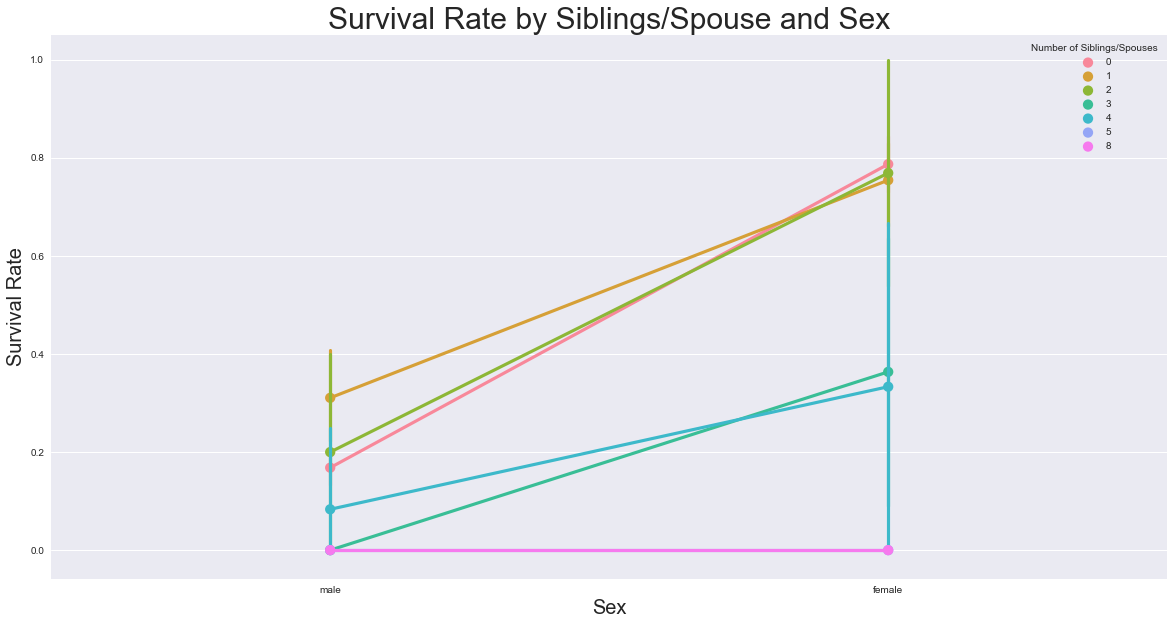

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="Sex", y="Survived", hue="SibSp", data=df)
plot.set_title("Survival Rate by Siblings/Spouse and Sex", fontsize=30)
plot.set_xlabel("Sex", fontsize=20);
plot.set_ylabel("Survival Rate", fontsize=20)
plt.legend(title="Number of Siblings/Spouses");

## Correlation Between Number of Parents/Children and Survival

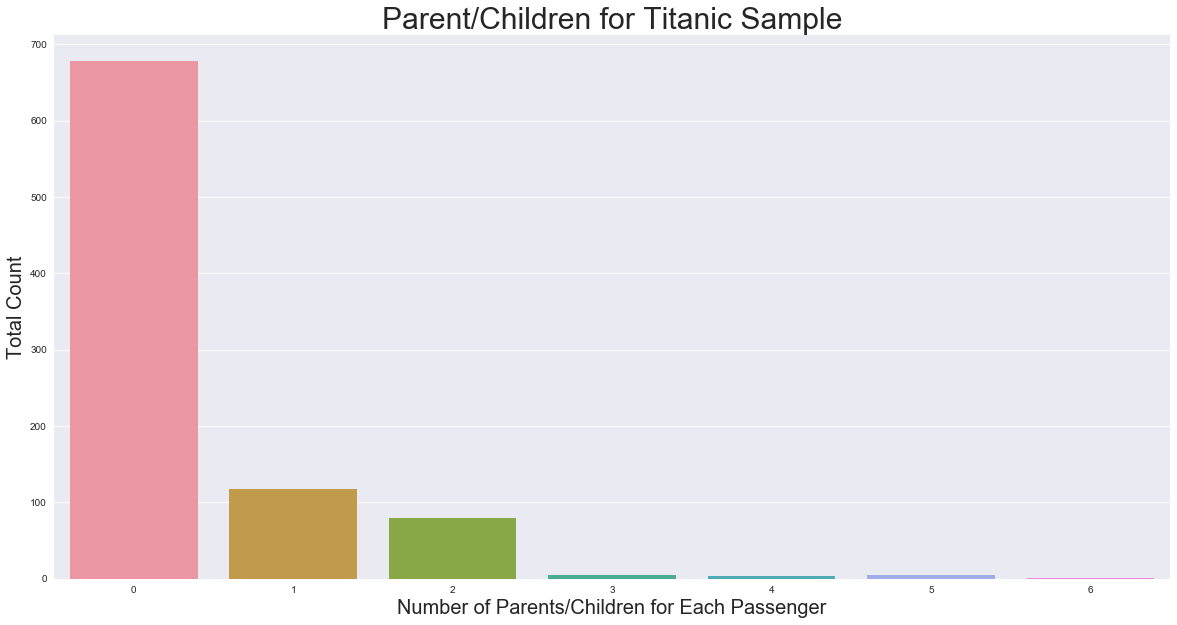

In [73]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.countplot(x="Parch", data=df)
plot.set_title("Parent/Children for Titanic Sample", fontsize=30)
plot.set_xlabel("Number of Parents/Children for Each Passenger", fontsize=20)
plot.set_ylabel("Total Count", fontsize=20);

### Just as in the Sibling/Spouse count, it appears that the higher numbers (3, 4, 5, and 6) consist mostly of 1-2 families. The vast majority of people had 0-2 parents/children with them on the Titanic.

In [25]:
#A new dataframe is created with the Survived series and dummie columns for Parent/Children
pd.concat([df['Survived'], pd.get_dummies(df['Parch']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
0,-0.147408
1,0.134174
2,0.075020
3,0.033391
4,-0.053002
5,-0.028398
6,-0.026456


### Parents/Children of 0 show a slight negative correlation with survival rate and 1 shows a slight positive correlation.

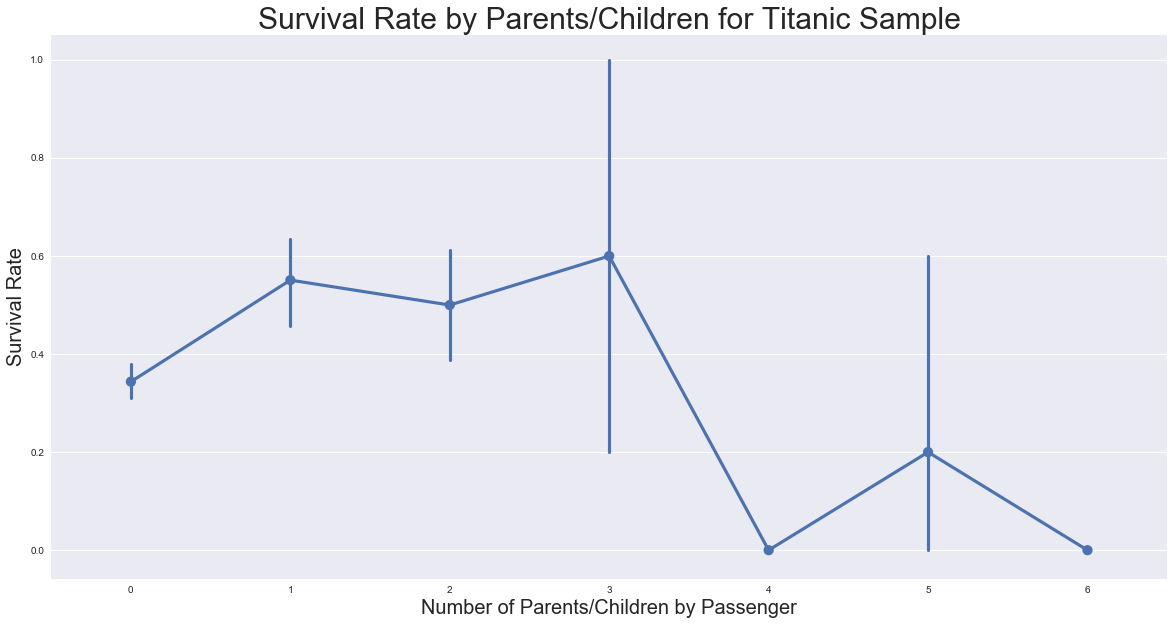

In [74]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="Parch", y="Survived", data=df)
plot.set_title('Survival Rate by Parents/Children for Titanic Sample', fontsize=30)
plot.set_xlabel("Number of Parents/Children by Passenger", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20);

### Parents/Children does not appear to be a good predictor of survival. Amounts above two don't have enough instances for an appropriate confidence interval while those <= 2 don't appear to differ enough and have overlapping confidence intervals.

### As seen below, the female samples mostly still have close to the same mean despite differences in the Parent/Children amounts.

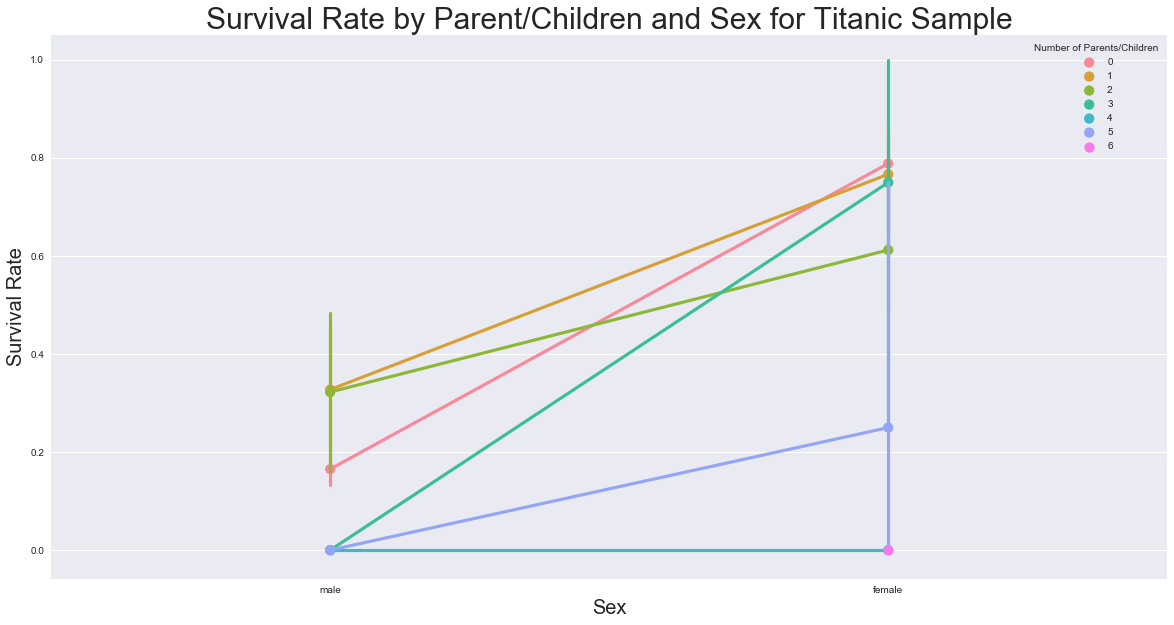

In [77]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.pointplot(x="Sex", y="Survived", hue="Parch", data=df)
plot.set_title("Survival Rate by Parent/Children and Sex for Titanic Sample", fontsize=30)
plot.set_xlabel("Sex", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20)
plt.legend(title="Number of Parents/Children");

## Correlation Between Fare and Survival

In [28]:
#Calculate the correlations between Fare and Survived
df[['Survived', 'Fare']].corr()[['Survived']]

,Survived
Survived,1.000000
Fare,0.257307


### It appears that the fare has a low positive correlation with survival.
### Below shows distribution of survivors and non-survivors by fare amounts.

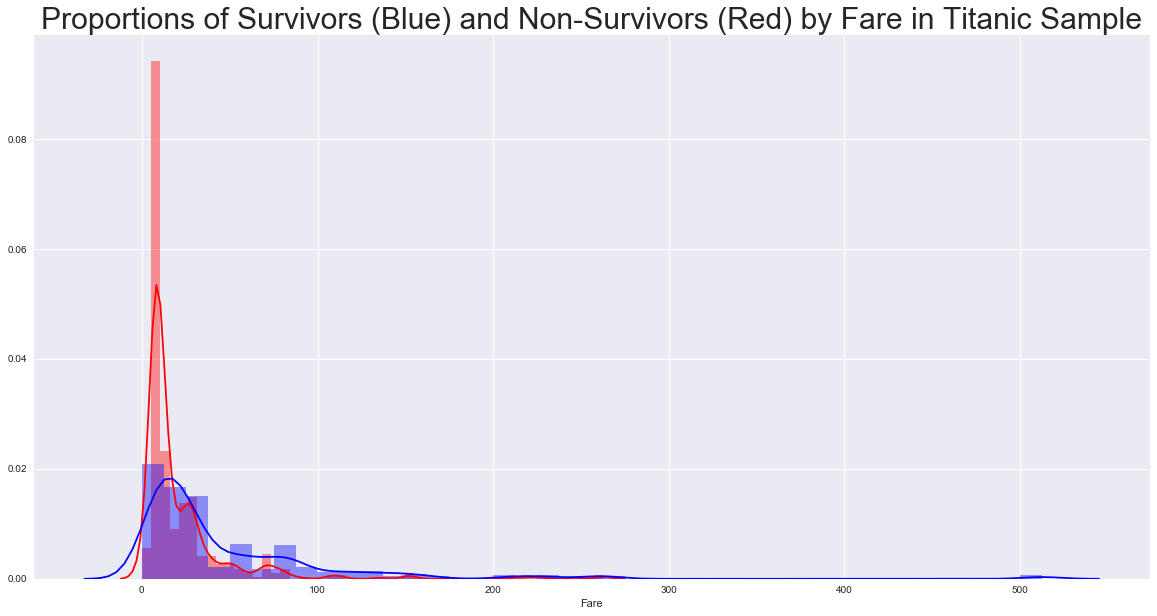

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(df[(df['Survived'] == 0) & (df['Fare'].notnull())]['Fare'], color="r").set_title("Proportions of Survivors (Blue) and Non-Survivors (Red) by Fare in Titanic Sample", fontsize=30);
sns.distplot(df[(df['Survived'] == 1) & (df['Fare'].notnull())]['Fare'], color="b");

### The above chart appears to show a much higher rate of demise for people with lower cabin fares; however the chart below shows that most cabin fares were for lower amounts.
### As we know from earlier, 75% of the sample paid 31 or less for their fares. So this correlation is mostly due to the majority of the people in the sample perishing.

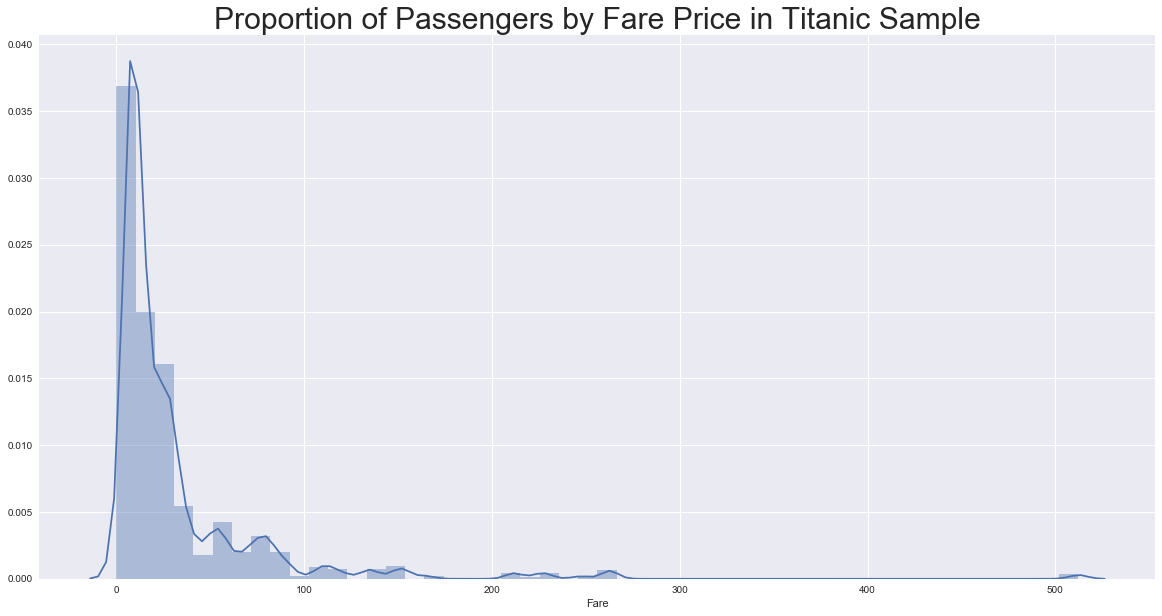

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(df[(df['Fare'].notnull())]['Fare']).set_title("Proportion of Passengers by Fare Price in Titanic Sample", fontsize=30);

## Correlation Between Title and Survival

### Titles can show many of the characteristics previously analyzed such as Sex, Class, and Age. We will use the extraction of titles as a new feature and to confirm earlier analysis.

In [31]:
#Create a new feature using a regular expression to extract the honorific from the person's name.
df['title'] = df['Name'].str.extract(', (\D+?)\.')

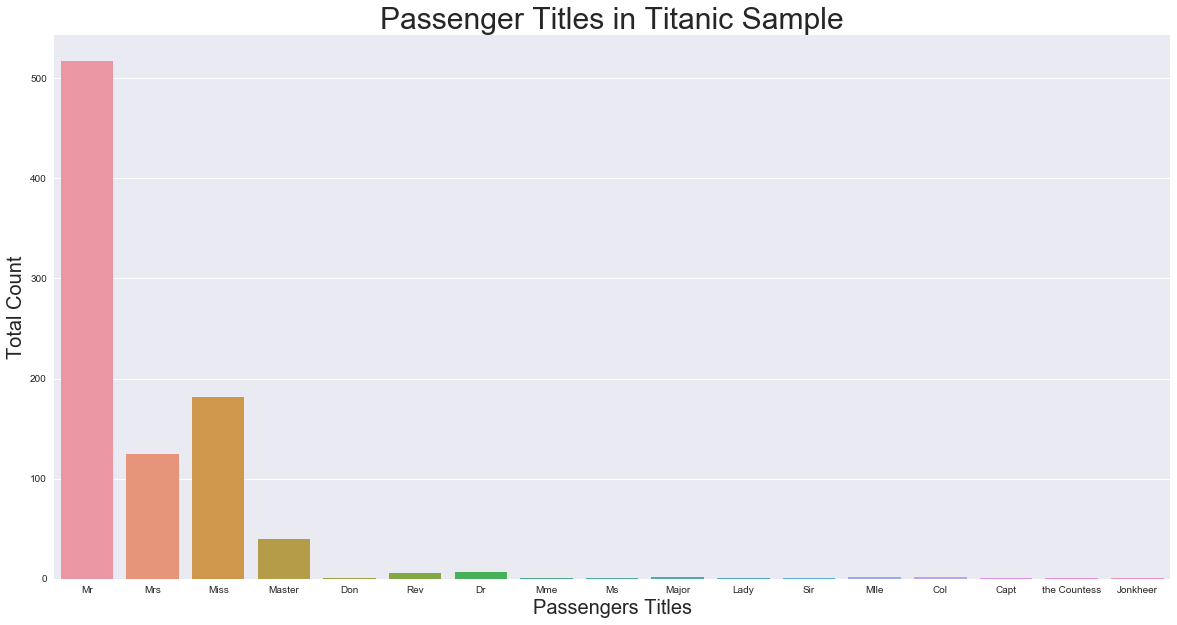

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.countplot(x="title", data=df)
plot.set_title("Passenger Titles in Titanic Sample", fontsize=30)
plot.set_xlabel("Passengers Titles", fontsize=20)
plot.set_ylabel("Total Count", fontsize=20);

### Above, the count of titles confirms our understanding of the number of males and females in the population.
### Below, some previous correlations are reconfirmed (e.g. Miss and Mrs. have a moderate positive correlation with survival while Mr. has a moderate to high negative correlation with survival.

In [33]:
pd.concat([df['Survived'], pd.get_dummies(df['title']).rename(columns=lambda x: str(x))], axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
Capt,-0.026456
Col,0.011329
Don,-0.026456
Dr,0.008185
Jonkheer,-0.026456
Lady,0.042470
Major,0.011329
Master,0.085221
Miss,0.327093


### Below shows the mean survivals of the various titles. 
1. The first five show a women's titles with only one person all having survived.
2. Next, we have the one knighted individual (denoting a high class level) having survived.
3. After that, there are the two women's titles with a significant number of instances in the sample (Mrs and Miss) showing high mean survival rates.
4. Next is shown Master which would denote a younger male (showing another example of a higher rate of survival for children).
5. The rest are all male titles gradually declining in mean survival (it appears that both Major and Col had only two instances each, or at least a small even number, which is shown by the complete spread of 0 to 1 for the confidence interval).
6. It should be noted that despite being the largest count for titles, Mr has the lowest mean survival rate besides the last four male titles with only one male individual each in the sample.

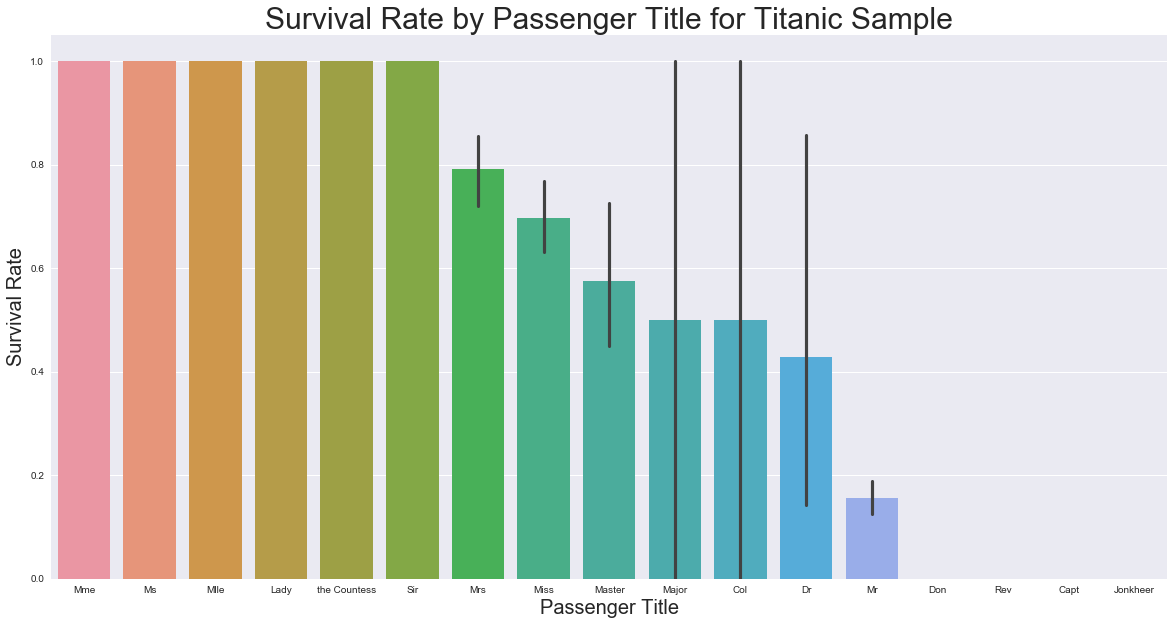

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.barplot(x="title", y="Survived", data=df, order=['Mme', 'Ms', 'Mlle', 'Lady', 'the Countess', 'Sir', 'Mrs', 'Miss', 'Master', 'Major', 'Col', 'Dr', 'Mr', 'Don', 'Rev', 'Capt', 'Jonkheer'])
plot.set_title("Survival Rate by Passenger Title for Titanic Sample", fontsize=30)
plot.set_xlabel("Passenger Title", fontsize=20)
plot.set_ylabel("Survival Rate", fontsize=20);

# Conclusion
## After analysis, it appears that the top three factors correlated with surviving on the Titanic were: 
## 1. Being Female
## 2. Being a Child
## 3. Being an Upper Class Individual
## It appears that the saying "women and children first" holds some truth.